In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cpi 

In [64]:
cpi.update()

# Import Data

In [2]:
master_data = pd.read_csv('/Users/joseservin/DataCamp/Projects/Customer_Personality_Analysis/marketing_campaign.csv', sep=';', index_col=0)
master_data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0


# Inspect Data

In [3]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

In [4]:
master_data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
master_data.index

Int64Index([ 5524,  2174,  4141,  6182,  5324,  7446,   965,  6177,  4855,
             5899,
            ...
             7004,  9817,  8080,  9432,  8372, 10870,  4001,  7270,  8235,
             9405],
           dtype='int64', name='ID', length=2240)

In [6]:
master_data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
master_data.shape

(2240, 28)

## Find how many NA values are in each column

<AxesSubplot:>

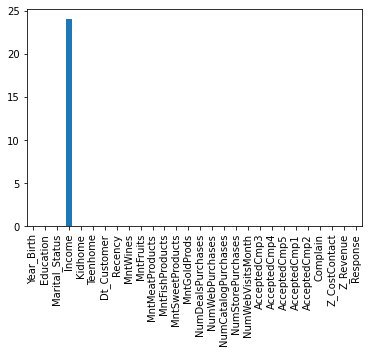

In [8]:
master_data.isna().sum().plot(kind='bar')

In [9]:
master_data.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## Consider what to do with NA data

### 24 missing values in the income column represents 24/2240 ~ 1% of data

In [10]:
master_data.loc[master_data['Income'].isna()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,...,7,0,0,0,0,0,0,3,11,0
5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,...,1,0,0,0,0,0,0,3,11,0
7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,...,2,0,0,0,0,0,0,3,11,0
7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,...,6,0,0,0,0,0,0,3,11,0
8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,...,6,0,0,0,0,0,0,3,11,0
10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,...,8,0,0,0,0,0,0,3,11,0
8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,...,9,0,0,0,0,0,0,3,11,0
9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,...,7,0,0,0,0,0,0,3,11,0
5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,...,1,0,0,0,0,0,0,3,11,0


### Let's first see if we can fill NA with average income 

In [11]:
master_data['Income'].mean()

52247.25135379061

### How True is this average salary?

<AxesSubplot:>

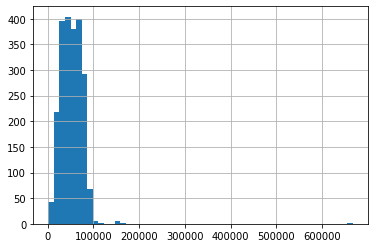

In [12]:
master_data['Income'].hist(bins=55)

In [13]:
# Compare 50th percentile to the median let's us know how skewed our data is
master_data['Income'].quantile(0.5)

51381.5

In [14]:
master_data['Income'].median()

51381.5

In [15]:
master_data['Income'].mean()

52247.25135379061

In [16]:
master_data['Income'].mode()

0    7500.0
dtype: float64

In [17]:
master_data['Income'].agg(['mean','median', 'max', 'min'])

mean       52247.251354
median     51381.500000
max       666666.000000
min         1730.000000
Name: Income, dtype: float64

## Filling NA's with median

In [18]:
master_data['Income'].fillna(51381.500000, inplace=True)

In [19]:
master_data.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [20]:
master_data['Income'].mean() # slight decrease due to introduction of new data for Income

52237.97544642857

## Look for outliers

In [21]:
master_data.dtypes


Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

<AxesSubplot:xlabel='ID', ylabel='Income'>

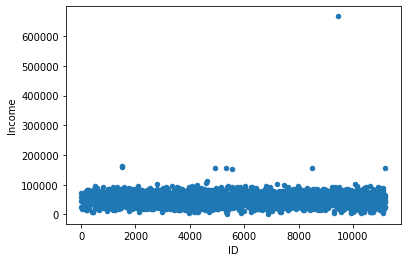

In [22]:
master_data.reset_index().plot(x='ID', y='Income', kind='scatter')

### How much does this row contribute to data enviornment? 

In [23]:
# Look at row with max income
master_data[master_data['Income'] == master_data['Income'].max()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,...,6,0,0,0,0,0,0,3,11,0


In [24]:
# Dropping outliers 
master_data = master_data[master_data['Income'] != 666666.0]

In [25]:
master_data['Income'].max()

162397.0

<AxesSubplot:xlabel='ID', ylabel='Income'>

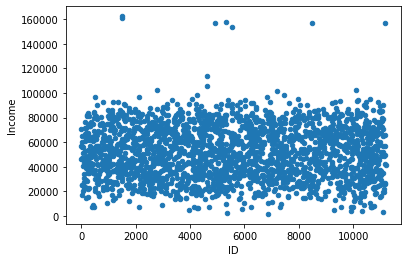

In [26]:
master_data.reset_index().plot(x='ID', y='Income', kind='scatter')

In [27]:
# Range is now
master_data['Income'].min()

1730.0

In [28]:
master_data['Income'].max()

162397.0

<AxesSubplot:>

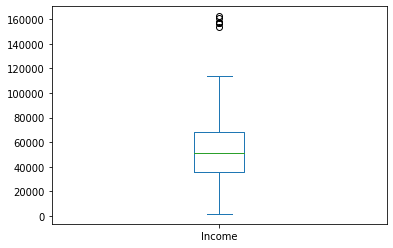

In [29]:
master_data['Income'].plot(kind='box')

In [30]:
master_data.sort_values('Income', ascending=False)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,1,...,1,0,0,0,0,0,0,3,11,0
1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,...,0,0,0,0,0,0,0,3,11,0
5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,1,...,1,0,0,0,0,0,0,3,11,0
8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,...,0,0,0,0,0,0,0,3,11,0
4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,...,1,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10311,1969,Graduation,Married,4428.0,0,1,2013-10-05,0,16,4,...,1,0,0,0,0,0,0,3,11,0
9931,1963,PhD,Married,4023.0,1,1,2014-06-23,29,5,0,...,19,0,0,0,0,0,0,3,11,0
11110,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,1,...,14,0,0,0,0,0,0,3,11,0


In [31]:
# Let's look at rows where income is greater than 120000
master_data[master_data['Income'] > 120000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,...,0,0,0,0,0,0,0,3,11,0
1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,1,...,1,0,0,0,0,0,0,3,11,0
5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,1,...,0,0,0,0,0,0,0,3,11,0
1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,...,0,0,0,0,0,0,0,3,11,0
5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,1,...,1,0,0,0,0,0,0,3,11,0
4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,...,1,0,0,0,0,0,0,3,11,0
11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,1,...,0,0,0,0,0,0,0,3,11,0


### Remove outliers (income > 120000)

In [32]:
master_data = master_data[master_data['Income'] <= 120000]

<AxesSubplot:xlabel='ID', ylabel='Income'>

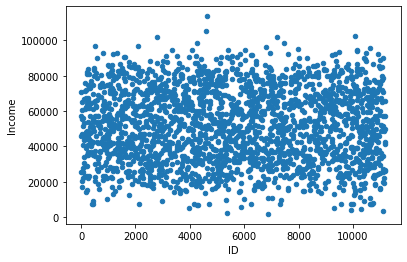

In [33]:
master_data.reset_index().plot(x='ID', y='Income', kind='scatter')

<AxesSubplot:>

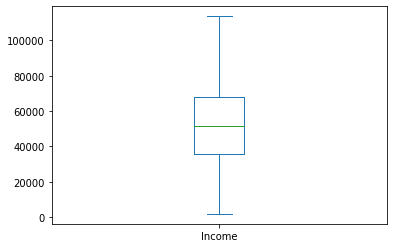

In [34]:
master_data['Income'].plot(kind='box')

# Sorting and Subsetting

In [35]:
master_data.sort_values('Income', ascending=False)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
4619,1945,PhD,Single,113734.0,0,0,2014-05-28,9,6,2,...,1,0,0,0,0,0,0,3,11,0
4611,1970,Graduation,Together,105471.0,0,0,2013-01-21,36,1009,181,...,3,0,0,1,1,0,0,3,11,1
10089,1974,Graduation,Divorced,102692.0,0,0,2013-04-05,5,168,148,...,2,0,1,1,1,1,0,3,11,1
2798,1977,PhD,Together,102160.0,0,0,2012-11-02,54,763,29,...,4,0,1,1,1,0,0,3,11,1
7215,1983,Graduation,Single,101970.0,0,0,2013-03-12,69,722,27,...,2,0,1,1,1,0,0,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10311,1969,Graduation,Married,4428.0,0,1,2013-10-05,0,16,4,...,1,0,0,0,0,0,0,3,11,0
9931,1963,PhD,Married,4023.0,1,1,2014-06-23,29,5,0,...,19,0,0,0,0,0,0,3,11,0
11110,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,1,...,14,0,0,0,0,0,0,3,11,0


In [36]:
master_data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [37]:
basic_education = master_data[master_data['Education'] == 'Basic']

In [38]:
basic_education.sort_values('Income', ascending=False)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
1951,1981,Basic,Married,34445.0,0,0,2013-01-27,92,228,122,...,9,0,0,0,0,0,0,3,11,0
2457,1975,Basic,Married,30801.0,0,1,2012-10-26,23,8,4,...,7,0,0,0,0,0,0,3,11,0
10250,1947,Basic,Together,28389.0,0,0,2012-11-20,49,1,5,...,7,0,0,0,0,0,0,3,11,0
8312,1961,Basic,Married,28249.0,0,0,2014-06-15,80,1,9,...,6,0,0,0,0,0,0,3,11,0
2563,1961,Basic,Married,28249.0,0,0,2014-06-15,80,1,9,...,6,0,0,0,0,0,0,3,11,0
8234,1973,Basic,Together,27190.0,1,0,2013-08-15,13,1,6,...,8,1,0,0,0,0,0,3,11,1
5043,1951,Basic,Married,26997.0,0,0,2012-11-05,89,7,23,...,7,0,0,0,0,0,0,3,11,0
9960,1991,Basic,Single,26868.0,1,0,2014-04-30,52,0,0,...,7,0,0,0,0,0,0,3,11,0
11187,1978,Basic,Single,26487.0,1,0,2013-05-20,23,2,8,...,5,0,0,0,0,0,0,3,11,0


<AxesSubplot:>

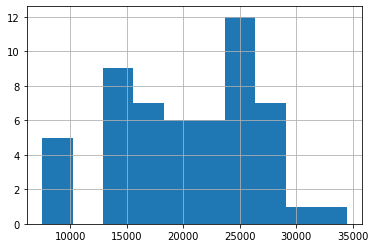

In [39]:
basic_education['Income'].hist()

In [40]:
phd_education = master_data[master_data['Education'] == 'PhD']

<AxesSubplot:>

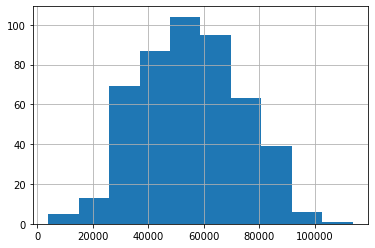

In [41]:
phd_education['Income'].hist()

In [42]:
phd_and_single = master_data[(master_data['Education'] == 'PhD') & (master_data['Marital_Status'] == 'Single')]

In [43]:
phd_and_single.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,22,...,3,0,0,1,1,0,0,3,11,1
7281,1959,PhD,Single,51381.5,0,0,2013-11-05,80,81,11,...,2,0,0,0,0,0,0,3,11,0
1016,1959,PhD,Single,34554.0,0,1,2014-03-30,43,41,1,...,6,0,0,0,0,0,0,3,11,0
7431,1991,PhD,Single,68126.0,0,0,2012-11-10,40,1332,17,...,9,0,1,0,0,0,0,3,11,1
2937,1974,PhD,Single,68352.0,0,1,2013-08-28,47,614,16,...,6,0,0,0,0,0,0,3,11,0


In [44]:
basic_education['Income'].mean()

20306.25925925926

In [45]:
phd_education['Income'].mean()

55239.49481327801

In [46]:
phd_education.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0
6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,...,8,0,0,0,0,0,0,3,11,0
4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,...,9,0,0,0,0,0,0,3,11,1
5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,...,20,1,0,0,0,0,0,3,11,0
2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,22,...,3,0,0,1,1,0,0,3,11,1


In [47]:
phd_education[['Year_Birth','Income','Dt_Customer']]

,Year_Birth,Income,Dt_Customer
ID,,,
5324,1981,58293.0,2014-01-19
6177,1985,33454.0,2013-05-08
4855,1974,30351.0,2013-06-06
5899,1950,5648.0,2014-03-13
2114,1946,82800.0,2012-11-24
...,...,...,...
11133,1973,48432.0,2012-10-18
9589,1948,82032.0,2014-04-05
4286,1970,57642.0,2014-01-09


In [49]:
master_data.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [54]:
phd_and_masters = master_data[master_data['Education'].isin(['Master','PhD'])]

In [55]:
phd_and_masters.Education.unique() # used to verify Master category was pulled (error with first pull due to misspelling)

array(['PhD', 'Master'], dtype=object)

# Adding a new column to master data

In [56]:
master_data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [59]:
master_data.Dt_Customer.min()

'2012-07-30'

In [60]:
master_data.Dt_Customer.max()

'2014-06-29'

In [61]:
# Add Enrollment_Year column to DF
master_data.insert(loc=5, column='Enrollment_Year', value= pd.DatetimeIndex(master_data['Dt_Customer']).year)

In [62]:
master_data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Enrollment_Year,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,2012,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,2014,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,2013,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,2014,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,2014,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


## Adjust income for inflation based off Enrollment_Year -> Current Year 2021

In [66]:
def apply_inflation (data, column):
    """ Adjust for inflation given DataFrame and column"""
    return data.apply(lambda x: cpi.inflate(x[column], 
                      x.Enrollment_Year), axis=1)

In [68]:
# Adjust Income based off Enrollment_Year
master_data.insert(loc=3, column='Adjusted_Income', value= apply_inflation(master_data, 'Income'))

In [69]:
master_data.head() # Spot check some Adjusted Incomes 

,Year_Birth,Education,Marital_Status,Adjusted_Income,Income,Kidhome,Enrollment_Year,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,63585.541286,58138.0,0,2012,0,2012-09-04,58,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,49157.300994,46344.0,1,2014,1,2014-03-08,38,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,77192.467241,71613.0,0,2013,0,2013-08-21,26,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,28263.538803,26646.0,1,2014,0,2014-02-10,26,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,61831.662067,58293.0,1,2014,0,2014-01-19,94,...,5,0,0,0,0,0,0,3,11,0


# Cummulative Statistics

In [70]:
master_data['Income'].sum()

115240229.0

In [86]:
master_data.drop('Adjusted_Income_cumsum', axis=1, inplace=True)

In [89]:
master_data = master_data.sort_values('Dt_Customer')

In [90]:
master_data.head()

,Year_Birth,Education,Marital_Status,Adjusted_Income,Income,Kidhome,Enrollment_Year,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
6653,1970,PhD,Married,60326.314738,55158.0,1,2012,1,2012-07-30,72,...,7,0,0,0,0,0,0,3,11,1
6181,1950,2n Cycle,Together,57094.430695,52203.0,0,2012,0,2012-07-31,36,...,6,0,0,0,0,0,0,3,11,0
2611,1959,Master,Together,90313.386378,82576.0,0,2012,0,2012-08-01,66,...,1,0,0,1,0,0,0,3,11,0
4692,1976,Graduation,Married,8202.751379,7500.0,1,2012,0,2012-08-01,19,...,9,1,0,0,0,0,0,3,11,1
7118,1957,Graduation,Married,80718.354665,73803.0,0,2012,1,2012-08-01,61,...,6,1,0,0,0,0,0,3,11,1


In [91]:
master_data.insert(loc=2, column='Adjusted_Income_cumsum', value= master_data['Adjusted_Income'].cumsum())

In [92]:
master_data.head()

,Year_Birth,Education,Adjusted_Income_cumsum,Marital_Status,Adjusted_Income,Income,Kidhome,Enrollment_Year,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
6653,1970,PhD,60326.314738,Married,60326.314738,55158.0,1,2012,1,2012-07-30,...,7,0,0,0,0,0,0,3,11,1
6181,1950,2n Cycle,117420.745433,Together,57094.430695,52203.0,0,2012,0,2012-07-31,...,6,0,0,0,0,0,0,3,11,0
2611,1959,Master,207734.131811,Together,90313.386378,82576.0,0,2012,0,2012-08-01,...,1,0,0,1,0,0,0,3,11,0
4692,1976,Graduation,215936.883189,Married,8202.751379,7500.0,1,2012,0,2012-08-01,...,9,1,0,0,0,0,0,3,11,1
7118,1957,Graduation,296655.237855,Married,80718.354665,73803.0,0,2012,1,2012-08-01,...,6,1,0,0,0,0,0,3,11,1


# Question: Find which customer accepted the most offers from Campaigns